In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR


In [22]:
np.random.seed(42)
c1_mean = [-3, 0]
c1_cov = [[1,0], [0, 1]]
x_c1, y_c1 = np.random.multivariate_normal(c1_mean, c1_cov, size = 100).T

c2_mean = [3, 0]
x_c2, y_c2 = np.random.multivariate_normal(c2_mean, c1_cov, size = 100).T

c3_mean = [0, 3]
x_c3, y_c3 = np.random.multivariate_normal(c3_mean, c1_cov, size = 100).T

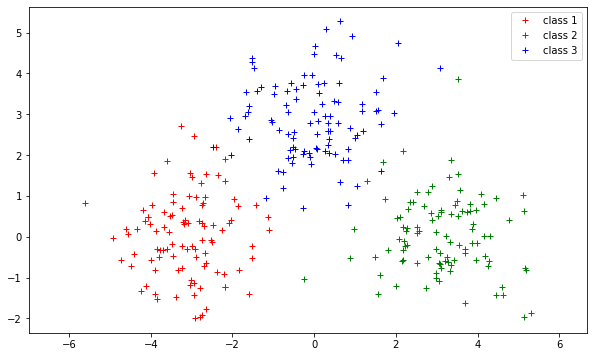

In [149]:
plt.figure(figsize= (10,6))
plt.plot(x_c1, y_c1, '+', c = 'r', label = 'class 1')
plt.plot(x_c2, y_c2, '+', c = 'g', label = 'class 2')
plt.plot(x_c3, y_c3, '+', c = 'b', label = 'class 3')
plt.axis('equal')
plt.legend()

In [143]:
#xx1 = np.array([np.linspace(-6, 5, 100)])
#xx2 = np.array([np.linspace(-6, 5, 100)])
#x1 = np.concatenate([xx1, xx2], axis = 0).T
x1 = np.array([np.linspace(-6, 5, 100)])
w1 = np.array([[- np.sqrt(1/2), -np.sqrt(1/2)]])
w2 = np.array([[np.sqrt(1/2), - np.sqrt(1/2)]])
w3 = np.array([[0, 1]])

y1 = (w1.T*x1).T
y1 = y1[:, 1].T
y1 = y1.reshape(-1,1)


y2 = (w2.T*x1).T
y2 = y2[:, 0].T
y2 = y2.reshape(-1,1)

y3 = (w3.T*x1).T
y3 = y3[:, 0].T
y3 = y3.reshape(-1,1)


#print((w1.T*x1).T)

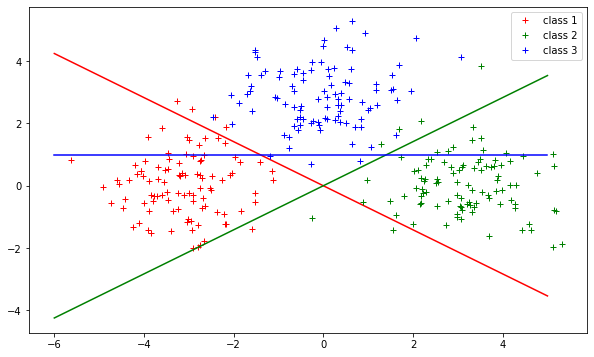

In [150]:
plt.figure(figsize= (10,6))
plt.plot(x_c1, y_c1, '+', c = 'r', label = 'class 1')
plt.plot(x1[0].reshape(-1,1), y1, '-', c = 'r')
plt.plot(x_c2, y_c2, '+', c = 'g', label = 'class 2')
plt.plot(x1[0].reshape(-1,1), y2, '-', c = 'g')
plt.plot(x_c3, y_c3, '+', c = 'b', label = 'class 3')
plt.plot(x1[0].reshape(-1,1), y3 + 1, '-', c = 'b')
#plt.axis('equal')
plt.legend()

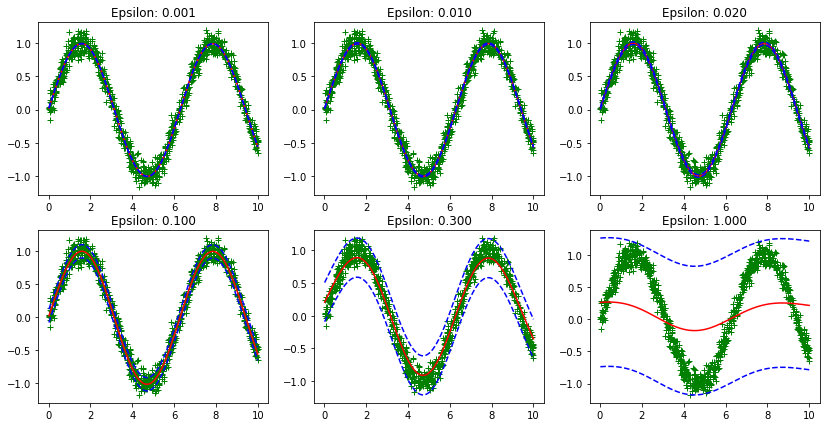

In [77]:
# data generation
noise = np.random.normal(0,0.1,1000)
f = lambda X: np.sin(X) + noise
x = np.sort(np.random.uniform(0,10,1000))
y = f(x)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#plt.plot(x, y, '+')
epsilon = [0.001, 0.01, 0.02, 0.1, 0.3, 1]
plt.figure(figsize= (14,7))
for i in range(len(epsilon)):
    model = SVR(kernel='rbf', C=1, epsilon=epsilon[i])
    reg = model.fit(x.reshape(-1,1), y)
    x_plot = np.sort(np.random.uniform(0,10,10000))
    y_pred = reg.predict(x.reshape(-1,1))

    plt.subplot(2, 3, i + 1)
    plt.plot(x, y, '+', c = 'g')
    plt.plot(x, y_pred, c = 'r',)
    plt.plot(x, y_pred + epsilon[i], '--', c = 'b')
    plt.plot(x, y_pred - epsilon[i], '--', c = 'b')
    plt.title( 'Epsilon: %0.3f' % epsilon[i] )

